In [3]:
#from pixell import enmap, enplot
import numpy as np
import matplotlib.pyplot as plt
from ja import Timer
from astropy import units as u
from astropy import constants as c
from pyuvdata import UVData

In [2]:
# These are the CASA-calculated PSFs
def psf_path(JD):
    return '/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/'+str(JD)+'_sliced/'
psf_file = 'zen.010601_011009.calibrated.HH.dirty.psf.fits'

In [56]:
timer = Timer()
timer.start()
uv8098 = UVData()
uv8098.read(psf_path(2458098)+'zen.010601_011009.calibrated.HH.uvfits')
timer.stop('Reading')

Reading 101.97712802886963 sec


In [57]:
timer = Timer()
timer.start()
uv8099 = UVData()
uv8099.read(psf_path(2458099)+'zen.010601_011009.calibrated.HH.uvfits')
timer.stop('Reading')

Reading 147.828430891037 sec


In [58]:
def bl_length(uvd):
    """ Heavy forbid you want the baseline length """
    return np.sqrt(np.power(uvd.uvw_array, 2).sum(axis=1))

In [59]:
blm8098 = bl_length(uv8098)

In [71]:
print(uv8098.lst_array.shape, uv8099.lst_array.shape)

(31694,) (31694,)


In [77]:
print(uv8098.lst_array[0], uv8099.lst_array[0])
print((uv8098.lst_array[0] - uv8099.lst_array[0])*24*3600.)

0.28879768053932087 0.2887613730492455
3.1369671425130363


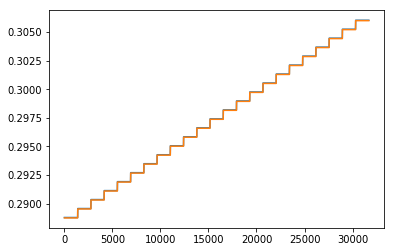

In [74]:
plt.plot(uv8098.lst_array)
plt.plot(uv8099.lst_array)

(3.135, 3.14)

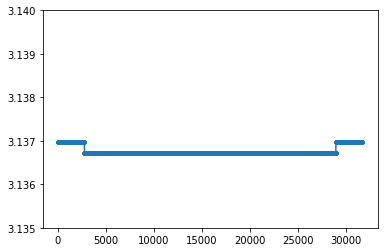

In [86]:
# Time offset.  May not be able to get around this one ... what the heck?
plt.plot(((uv8098.lst_array-uv8099.lst_array)*u.day).to(u.s),'.-')
plt.ylim([3.135,3.140])

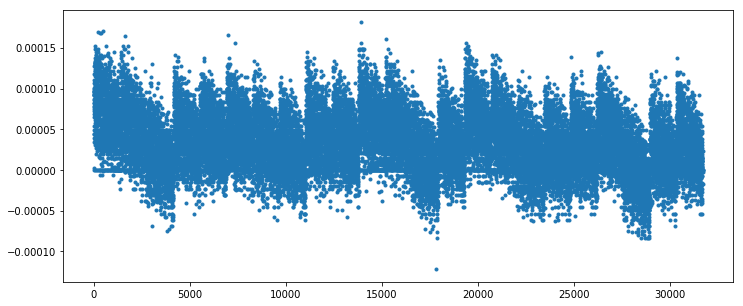

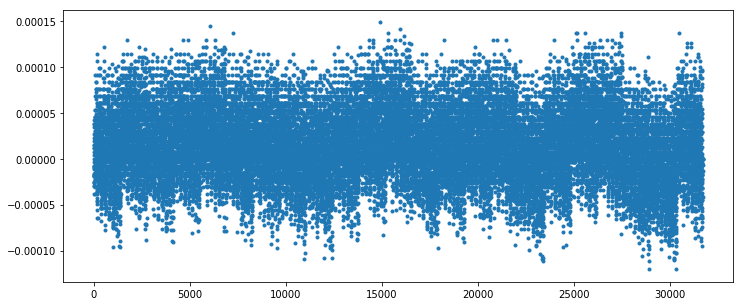

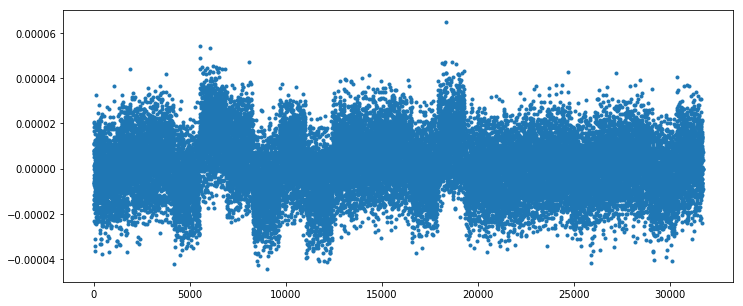

In [92]:
plt.figure(figsize=[12,5])
plt.plot(uv8098.uvw_array[:,0]-uv8099.uvw_array[:,0],'.')
plt.show()
plt.figure(figsize=[12,5])
plt.plot(uv8098.uvw_array[:,1]-uv8099.uvw_array[:,1],'.')
plt.show()
plt.figure(figsize=[12,5])
plt.plot(uv8098.uvw_array[:,2]-uv8099.uvw_array[:,2],'.')
plt.show()

In [127]:
harmonized_flags = np.logical_or(uv8098.flag_array, uv8099.flag_array)

In [128]:
uv8098.flag_array.sum()

98961224

In [129]:
uv8099.flag_array.sum()

88145384

In [130]:
uv8099.flag_array.shape

(31694, 1, 1024, 4)

In [131]:
xx8098 = uv8098.data_array[:,0,:,0].squeeze()
xx8099 = uv8099.data_array[:,0,:,0].squeeze()
flags_xx = ~harmonized_flags[:,0,:,0].squeeze()
print(xx8098.shape, xx8099.shape, flags_xx.shape)

(31694, 1024) (31694, 1024) (31694, 1024)


divide by zero encountered in true_divide
invalid value encountered in true_divide


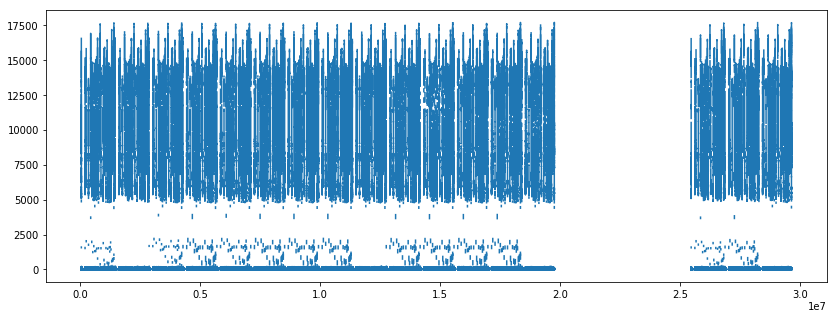

In [134]:
plt.figure(figsize=[14,5])
plt.plot(np.abs( (xx8098/flags_xx).flatten()) ) 
# Sigh.  Why, oh why, are they setting the flagged data to zero?

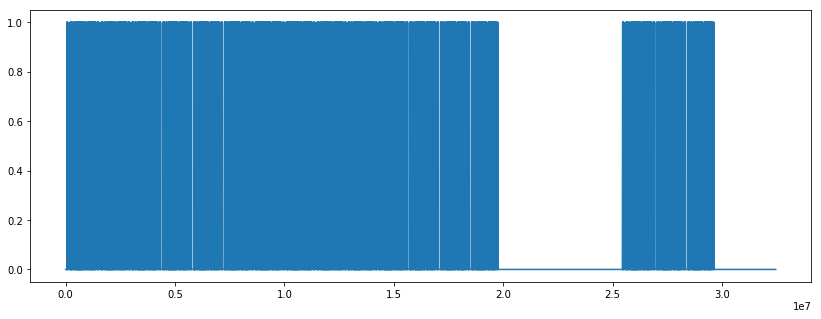

In [124]:
plt.figure(figsize=[14,5])
plt.plot( ~uv8098.flag_array[:,0,:,0].flatten() )

divide by zero encountered in true_divide
invalid value encountered in true_divide


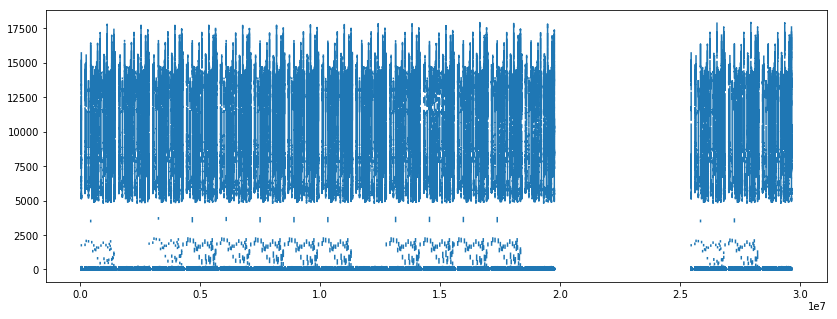

In [133]:
plt.figure(figsize=[14,5])
plt.plot(np.abs( (xx8099/flags_xx).flatten() ))

divide by zero encountered in true_divide
invalid value encountered in true_divide


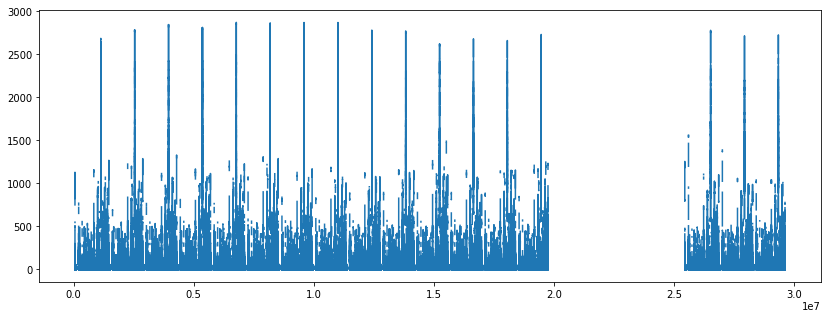

In [142]:
# wait, why are the autocorrelations showing such big differences?  those should change really smoothly ...
plt.figure(figsize=[14,5])
plt.plot(np.abs( ((xx8099-xx8098)/flags_xx).flatten() ))

divide by zero encountered in true_divide


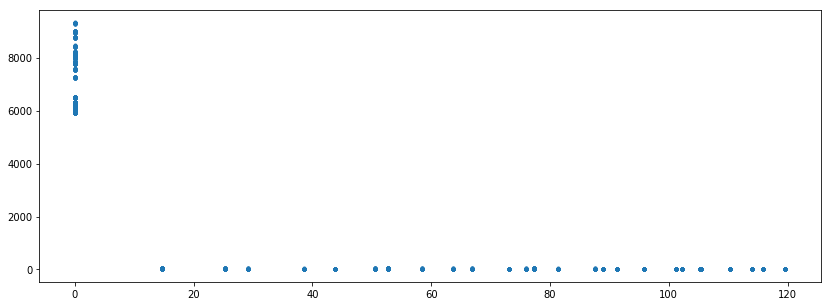

In [144]:
ch = 605
plt.figure(figsize=[14,5])
plt.plot(blm8098, np.abs(((xx8098[:,ch])/flags_xx[:,600]).flatten() ),'.')

divide by zero encountered in true_divide


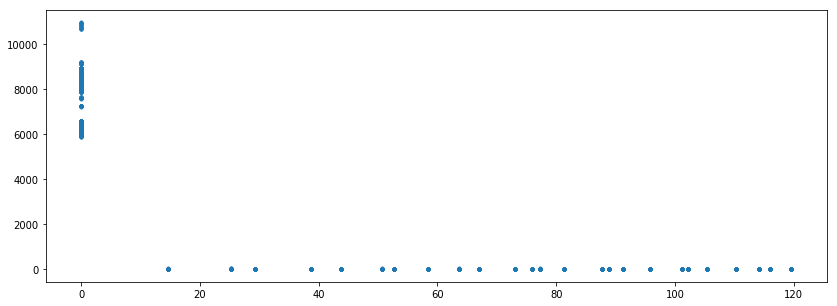

In [145]:
ch = 605
plt.figure(figsize=[14,5])
plt.plot(blm8098, np.abs(((xx8099[:,ch])/flags_xx[:,600]).flatten() ),'.')

divide by zero encountered in true_divide


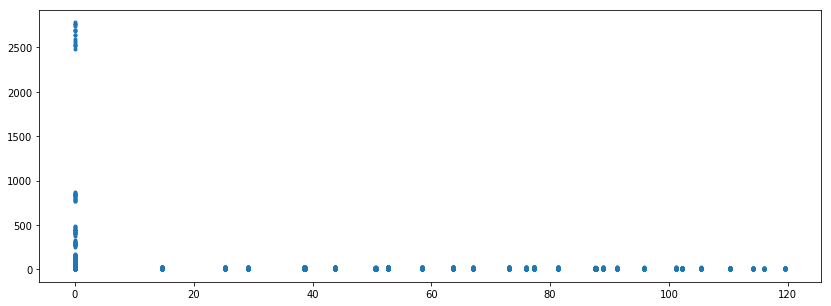

In [143]:
ch = 605
plt.figure(figsize=[14,5])
plt.plot(blm8098, np.abs(((xx8098[:,ch]-xx8099[:,605])/flags_xx[:,600]).flatten() ),'.')

divide by zero encountered in true_divide
divide by zero encountered in true_divide


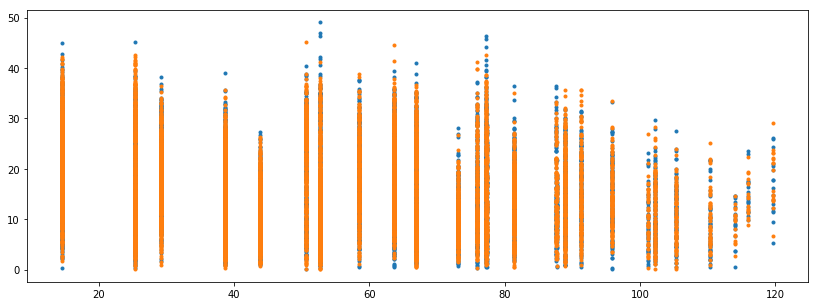

In [152]:
ch = 605
plt.figure(figsize=[14,5])
plt.plot(blm8098[blm8098 > 0], np.abs(((xx8098[:,ch])/flags_xx[:,ch]).flatten() )[blm8098 > 0],'.')
plt.plot(blm8098[blm8098 > 0], np.abs(((xx8099[:,ch])/flags_xx[:,ch]).flatten() )[blm8098 > 0],'.')

divide by zero encountered in true_divide


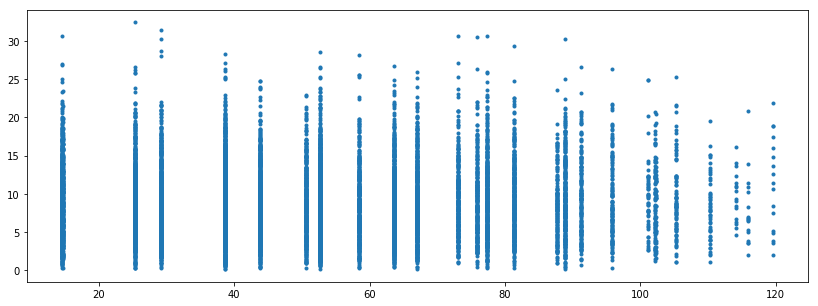

In [153]:
ch = 605
plt.figure(figsize=[14,5])
plt.plot(blm8098[blm8098 > 0], np.abs(((xx8098[:,ch]-xx8099[:,ch])/flags_xx[:,ch]).flatten() )[blm8098 > 0],'.')

In [94]:
uv8098.flag_array.shape

(31694, 1, 1024, 4)

divide by zero encountered in true_divide


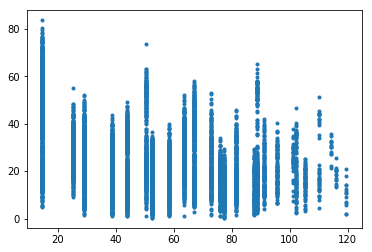

In [48]:
plt.plot(blm8098[blm8098 > 0], np.abs(uv8098.data_array[:,0,601,0]/~uv8098.flag_array[:,0,600,0])[blm8098 > 0],'.')

In [50]:
uv8098.write_uvfits?

In [ ]:
from scipy.stats import binned_statistic_2d

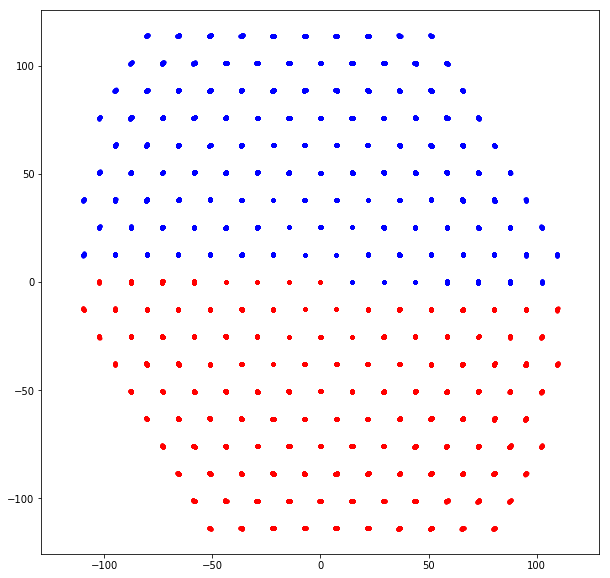

In [181]:
plt.figure(figsize=(10,10))
plt.plot(uv.uvw_array[:,0],uv.uvw_array[:,1],'b.')
plt.plot(-uv.uvw_array[:,0],-uv.uvw_array[:,1],'r.')
plt.axis('equal')
plt.show()

In [163]:
uv8098.uvw_array.shape

(31694, 3)

In [164]:
uv8098.data_array.shape

(31694, 1, 1024, 4)

In [165]:
uv8098.freq_array.shape

(1, 1024)

In [184]:
test = np.expand_dims(uv8098.uvw_array, axis=2)

In [186]:
test2 = np.repeat(test, 1024, axis=2)

In [190]:
f = uv8098.freq_array

In [201]:
test = np.repeat(np.repeat(np.expand_dims(uv.freq_array, axis = 0), 3, axis = 1), uv.Nblts, axis = 0)

In [206]:
uv8098.data_array.shape

(31694, 1, 1024, 4)

In [212]:
def true_uvw(uv):
    """ Expand the uvw_array in meters to a proper one in wavelengths for all frequencies """
    #uvw = np.zeros([uv.Nblts, 3, uv.Nspws, uv.Nfreqs, uv.Npols])
    uvw_m = np.repeat(np.expand_dims(uv.uvw_array, axis = 2), uv.Nfreqs, axis = 2)
    lmbda = (c.c/(np.repeat(np.repeat(np.expand_dims(uv.freq_array, axis = 0), 3, axis = 1), uv.Nblts, axis = 0)*u.Hz) ).value
    #print(uvw_m.shape)
    #print(lmbda.shape)
    uvw = uvw_m / lmbda
    #np.expand_dims(np.repeat(np.expand_dims(uvw_m/lmbda, axis=3), uv.Npols, axis = 3), axis=1)
    return uvw
    

In [214]:
uvw8098 = true_uvw(uv8098)

In [215]:
uvw8098.shape

(31694, 3, 1024)

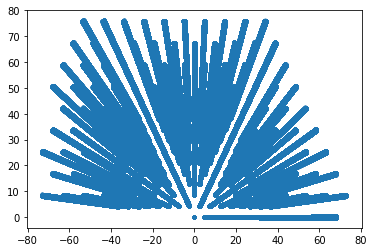

In [217]:
plt.plot(uvw8098[:,0,:].flatten(),uvw8098[:,1,:].flatten(),'.')

In [294]:
# uv gridding should be ... 1/FOV?  which depends on wavelength ...
# let's pick 
du = 1./((60*u.deg).to(u.rad).value)/2.
u_max = 80.
N_u = 2.*u_max/du

u_bins = np.linspace(-u_max, u_max, N_u)
v_bins = np.linspace(-u_max, u_max, N_u)
h, _ , _ = np.histogram2d(np.concatenate([uvw8098[:,1,:].flatten(), -uvw8098[:,1,:].flatten()]), 
                                   np.concatenate([uvw8098[:,0,:].flatten(), -uvw8098[:,0,:].flatten()]), 
                                   bins = [u_bins, v_bins])

object of type <class 'float'> cannot be safely interpreted as an integer.
object of type <class 'float'> cannot be safely interpreted as an integer.


divide by zero encountered in log10


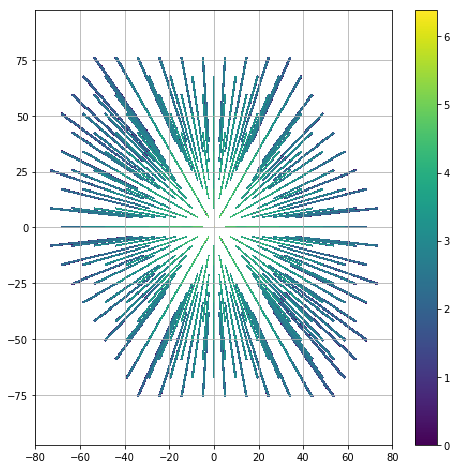

In [295]:
plt.figure(figsize=(8,8))
plt.imshow(np.log10(h),extent=[u_bins.min(), u_bins.max(), v_bins.min(), v_bins.max()], aspect='auto', origin='lower')
plt.colorbar()
plt.grid()
plt.axis('equal')
plt.show()

In [298]:
psf = np.fft.fftshift(np.abs(np.fft.fft2(h)))/psf.max()

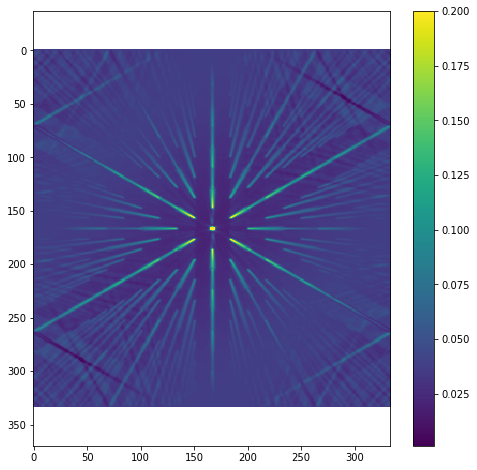

In [302]:
plt.figure(figsize=(8,8))
plt.imshow(psf, aspect='auto', vmax = 0.2)
plt.colorbar()
plt.axis('equal')
plt.show()

In [303]:
np.hanning?